In [2]:
from qiskit.quantum_info import Statevector, Operator
from qiskit import QuantumCircuit, Aer, execute
import numpy as np
import math
import matplotlib.pyplot as pl
import random

In [4]:
n = 3      #no. of qubits
N = 2**n   #dimension of matrix
t = 2      #no. of target states
length = list(range(n))
noi = math.floor(math.sqrt(N/t) * np.pi / 4)   #No of iterations
print("noi = ", noi)

#array to store coherence values after each suboperation in every grover's iteration
data = np.zeros(noi * 4)
x_axis = list(range(noi * 4))

#to set target states
target = np.zeros(t)
count = 0
flag = 0
i = 0
while(True):
    #to generate a random integer for target position
    a = random.randint(0,N-1)
    print("a = ",a)
    
    #checking if that number has already been chosen previously as target state
    for j in range(count):
        if(target[j] == a):
            flag = 1  #value is present in the target array
            
    #to store new value in target array
    if(flag == 0):
        #to store in count position of target array
        target[count] = a
        #updating count (position) value
        count += 1
        #checking for further iteration of i loop
        if(count == t):
            break
print("target = ",target)

phi = [0, np.pi/4, np.pi/2, np.pi*3/4, np.pi, np.pi*5/4, np.pi*3/2, np.pi*7/4]   #np.linspace( 0, np.pi)
x = np.zeros(len(phi), dtype=complex)
for i in range(len(phi)):
    x[i] = complex(np.cos(phi[i]), np.sin(phi[i]))
print(x)

noi =  1
a =  1
a =  0
target =  [1. 0.]
[ 1.00000000e+00+0.00000000e+00j  7.07106781e-01+7.07106781e-01j
  6.12323400e-17+1.00000000e+00j -7.07106781e-01+7.07106781e-01j
 -1.00000000e+00+1.22464680e-16j -7.07106781e-01-7.07106781e-01j
 -1.83697020e-16-1.00000000e+00j  7.07106781e-01-7.07106781e-01j]


In [5]:
def iteration(i):
    qc.barrier()
    count = i*4
    qc.append(O_operator,length)
    result = execute(qc, backend).result()
    state = result.get_statevector()
    display("applied O operator to |ψ2⟩", state.draw('latex'))
    density_operator = state.to_operator()
    coherence = 0
    for i in range(N):
        for j in range(N):
            if(i != j):
                coherence += abs(density_operator.data[i,j])
    print("coherence of |ψ2⟩ = ",coherence)
    data[count] = coherence

    qc.h(length)
    result = execute(qc, backend).result()
    state = result.get_statevector()
    display("applied Hadamard to all |ψ1⟩", state.draw('latex'))
    density_operator = state.to_operator()
    coherence = 0
    for i in range(N):
        for j in range(N):
            if(i != j):
                coherence += abs(density_operator.data[i,j])
    print("coherence of |ψ1⟩ = ",coherence)
    data[count+1] = coherence

    qc.append(P_operator,length)
    result = execute(qc, backend).result()
    state = result.get_statevector()
    display("applied P operator to |ψ4⟩", state.draw('latex'))
    density_operator = state.to_operator()
    coherence = 0
    for i in range(N):
        for j in range(N):
            if(i != j):
                coherence += abs(density_operator.data[i,j])
    print("coherence of |ψ4⟩ = ",coherence)
    data[count+2] = coherence

    qc.h(length)
    result = execute(qc, backend).result()
    state = result.get_statevector()
    display("applied Hadamard to all |ψ5⟩", state.draw('latex'))
    density_operator = state.to_operator()
    coherence = 0
    for i in range(N):
        for j in range(N):
            if(i != j):
                coherence += abs(density_operator.data[i,j])
    print("coherence of |ψ5⟩ = ",coherence)
    data[count+3] = coherence

for it in range(len(phi)):
    qc = QuantumCircuit(n)
    backend = Aer.get_backend('statevector_simulator')
    result = execute(qc, backend).result()
    state = result.get_statevector()
    display("initialised |ψ0⟩", state.draw('latex'))
    density_operator = state.to_operator()
    #print(density_operator.data)
    coherence = 0
    for i in range(N):
        for j in range(N):
            if(i != j):
                coherence += abs(density_operator.data[i,j])
    print("coherence of |ψ0⟩ = ",coherence)

    qc.h(length)
    result = execute(qc, backend).result()
    state = result.get_statevector()
    display("applied Hadamard to all |ψ1⟩", state.draw('latex'))
    density_operator = state.to_operator()
    #print(density_operator.data)
    coherence = 0
    for i in range(N):
        for j in range(N):
            if(i != j):
                coherence += abs(density_operator.data[i,j])
    print("coherence of |ψ1⟩ = ",coherence)

    #defining generalised O Operator
    count = 0
    choice = it
    O_operator = Operator(np.zeros((N,N)))
    for i in range(N):
        for j in range(N):
            if(i != j):   #off diagonal elements
                O_operator.data[i][j] = 0
            else:   
                '''
                if(count <= t):   #for the first t target states only
                    O_operator.data[i][j] = x[choice]
                    count += 1
                '''
                flag = 0
                for k in range(t-1):
                    if(i == target[k]):
                        O_operator.data[i][j] = x[choice]
                        count += 1
                        flag = 1
                if(flag == 0):
                    O_operator.data[i][j] = 1            
    print(O_operator)

    #defining P Operator
    P_operator = Operator(np.zeros((N,N)))
    for i in range(N):
        for j in range(N):
            if(i != j):    #off-diagonal elements
                P_operator.data[i][j] = 0
            else:
                if(i==0 & j==0):   #for 1st element only
                    P_operator.data[i][j] = 1
                else:
                    P_operator.data[i][j] = -1
    #print(P_operator)

    #sending out for x iterations of grover's operator
    for i in range(noi):
        print("--------",(i+1)," ITERATION--------")
        iteration(i)

    qc.draw('mpl')

'initialised |ψ0⟩'

<IPython.core.display.Latex object>

coherence of |ψ0⟩ =  0.0


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  7.000000000000001
Operator([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j]],
         input_dims=(2, 2, 2), output_dims=(2, 2, 2))
-------- 1  ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  7.000000000000001


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  4.224630586500988e-16


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  4.224630586500988e-16


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  7.000000000000001


'initialised |ψ0⟩'

<IPython.core.display.Latex object>

coherence of |ψ0⟩ =  0.0


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  7.000000000000001
Operator([[1.        +0.j        , 0.        +0.j        ,
           0.        +0.j        , 0.        +0.j        ,
           0.        +0.j        , 0.        +0.j        ,
           0.        +0.j        , 0.        +0.j        ],
          [0.        +0.j        , 0.70710678+0.70710678j,
           0.        +0.j        , 0.        +0.j        ,
           0.        +0.j        , 0.        +0.j        ,
           0.        +0.j        , 0.        +0.j        ],
          [0.        +0.j        , 0.        +0.j        ,
           1.        +0.j        , 0.        +0.j        ,
           0.        +0.j        , 0.        +0.j        ,
           0.        +0.j        , 0.        +0.j        ],
          [0.        +0.j        , 0.        +0.j        ,
           0.        +0.j        , 1.        +0.j        ,
           0.        +0.j        , 0.        +0.j        ,
           0.        +0.j        , 0.        +0.j        ],
          [0.

'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  7.000000000000001


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  1.680196459228431


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  1.680196459228431


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  6.869294840808085


'initialised |ψ0⟩'

<IPython.core.display.Latex object>

coherence of |ψ0⟩ =  0.0


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  7.000000000000001
Operator([[1.000000e+00+0.j, 0.000000e+00+0.j, 0.000000e+00+0.j,
           0.000000e+00+0.j, 0.000000e+00+0.j, 0.000000e+00+0.j,
           0.000000e+00+0.j, 0.000000e+00+0.j],
          [0.000000e+00+0.j, 6.123234e-17+1.j, 0.000000e+00+0.j,
           0.000000e+00+0.j, 0.000000e+00+0.j, 0.000000e+00+0.j,
           0.000000e+00+0.j, 0.000000e+00+0.j],
          [0.000000e+00+0.j, 0.000000e+00+0.j, 1.000000e+00+0.j,
           0.000000e+00+0.j, 0.000000e+00+0.j, 0.000000e+00+0.j,
           0.000000e+00+0.j, 0.000000e+00+0.j],
          [0.000000e+00+0.j, 0.000000e+00+0.j, 0.000000e+00+0.j,
           1.000000e+00+0.j, 0.000000e+00+0.j, 0.000000e+00+0.j,
           0.000000e+00+0.j, 0.000000e+00+0.j],
          [0.000000e+00+0.j, 0.000000e+00+0.j, 0.000000e+00+0.j,
           0.000000e+00+0.j, 1.000000e+00+0.j, 0.000000e+00+0.j,
           0.000000e+00+0.j, 0.000000e+00+0.j],
          [0.000000e+00+0.j, 0.000000e+00+0.j, 0.000000e+00+0.j,
      

'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  7.000000000000001


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  3.5000000000000013


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  3.5000000000000013


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  5.915348814110818


'initialised |ψ0⟩'

<IPython.core.display.Latex object>

coherence of |ψ0⟩ =  0.0


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  7.000000000000001
Operator([[ 1.        +0.j        ,  0.        +0.j        ,
            0.        +0.j        ,  0.        +0.j        ,
            0.        +0.j        ,  0.        +0.j        ,
            0.        +0.j        ,  0.        +0.j        ],
          [ 0.        +0.j        , -0.70710678+0.70710678j,
            0.        +0.j        ,  0.        +0.j        ,
            0.        +0.j        ,  0.        +0.j        ,
            0.        +0.j        ,  0.        +0.j        ],
          [ 0.        +0.j        ,  0.        +0.j        ,
            1.        +0.j        ,  0.        +0.j        ,
            0.        +0.j        ,  0.        +0.j        ,
            0.        +0.j        ,  0.        +0.j        ],
          [ 0.        +0.j        ,  0.        +0.j        ,
            0.        +0.j        ,  1.        +0.j        ,
            0.        +0.j        ,  0.        +0.j        ,
            0.        +0.j        ,  0.    

'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  7.000000000000001


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  4.800155390298222


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  4.800155390298222


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  4.346816030837189


'initialised |ψ0⟩'

<IPython.core.display.Latex object>

coherence of |ψ0⟩ =  0.0


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  7.000000000000001
Operator([[ 1.+0.0000000e+00j,  0.+0.0000000e+00j,  0.+0.0000000e+00j,
            0.+0.0000000e+00j,  0.+0.0000000e+00j,  0.+0.0000000e+00j,
            0.+0.0000000e+00j,  0.+0.0000000e+00j],
          [ 0.+0.0000000e+00j, -1.+1.2246468e-16j,  0.+0.0000000e+00j,
            0.+0.0000000e+00j,  0.+0.0000000e+00j,  0.+0.0000000e+00j,
            0.+0.0000000e+00j,  0.+0.0000000e+00j],
          [ 0.+0.0000000e+00j,  0.+0.0000000e+00j,  1.+0.0000000e+00j,
            0.+0.0000000e+00j,  0.+0.0000000e+00j,  0.+0.0000000e+00j,
            0.+0.0000000e+00j,  0.+0.0000000e+00j],
          [ 0.+0.0000000e+00j,  0.+0.0000000e+00j,  0.+0.0000000e+00j,
            1.+0.0000000e+00j,  0.+0.0000000e+00j,  0.+0.0000000e+00j,
            0.+0.0000000e+00j,  0.+0.0000000e+00j],
          [ 0.+0.0000000e+00j,  0.+0.0000000e+00j,  0.+0.0000000e+00j,
            0.+0.0000000e+00j,  1.+0.0000000e+00j,  0.+0.0000000e+00j,
            0.+0.0000000e+00j,  0.+0.000000

'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  7.000000000000001


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  5.250000000000001


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  5.250000000000001


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  3.500000000000002


'initialised |ψ0⟩'

<IPython.core.display.Latex object>

coherence of |ψ0⟩ =  0.0


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  7.000000000000001
Operator([[ 1.        +0.j        ,  0.        +0.j        ,
            0.        +0.j        ,  0.        +0.j        ,
            0.        +0.j        ,  0.        +0.j        ,
            0.        +0.j        ,  0.        +0.j        ],
          [ 0.        +0.j        , -0.70710678-0.70710678j,
            0.        +0.j        ,  0.        +0.j        ,
            0.        +0.j        ,  0.        +0.j        ,
            0.        +0.j        ,  0.        +0.j        ],
          [ 0.        +0.j        ,  0.        +0.j        ,
            1.        +0.j        ,  0.        +0.j        ,
            0.        +0.j        ,  0.        +0.j        ,
            0.        +0.j        ,  0.        +0.j        ],
          [ 0.        +0.j        ,  0.        +0.j        ,
            0.        +0.j        ,  1.        +0.j        ,
            0.        +0.j        ,  0.        +0.j        ,
            0.        +0.j        ,  0.    

'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  7.000000000000001


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  4.800155390298223


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  4.800155390298223


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  4.346816030837188


'initialised |ψ0⟩'

<IPython.core.display.Latex object>

coherence of |ψ0⟩ =  0.0


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  7.000000000000001
Operator([[ 1.0000000e+00+0.j,  0.0000000e+00+0.j,  0.0000000e+00+0.j,
            0.0000000e+00+0.j,  0.0000000e+00+0.j,  0.0000000e+00+0.j,
            0.0000000e+00+0.j,  0.0000000e+00+0.j],
          [ 0.0000000e+00+0.j, -1.8369702e-16-1.j,  0.0000000e+00+0.j,
            0.0000000e+00+0.j,  0.0000000e+00+0.j,  0.0000000e+00+0.j,
            0.0000000e+00+0.j,  0.0000000e+00+0.j],
          [ 0.0000000e+00+0.j,  0.0000000e+00+0.j,  1.0000000e+00+0.j,
            0.0000000e+00+0.j,  0.0000000e+00+0.j,  0.0000000e+00+0.j,
            0.0000000e+00+0.j,  0.0000000e+00+0.j],
          [ 0.0000000e+00+0.j,  0.0000000e+00+0.j,  0.0000000e+00+0.j,
            1.0000000e+00+0.j,  0.0000000e+00+0.j,  0.0000000e+00+0.j,
            0.0000000e+00+0.j,  0.0000000e+00+0.j],
          [ 0.0000000e+00+0.j,  0.0000000e+00+0.j,  0.0000000e+00+0.j,
            0.0000000e+00+0.j,  1.0000000e+00+0.j,  0.0000000e+00+0.j,
            0.0000000e+00+0.j,  0.0000000e+

'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  7.000000000000001


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  3.5000000000000013


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  3.5000000000000013


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  5.915348814110818


'initialised |ψ0⟩'

<IPython.core.display.Latex object>

coherence of |ψ0⟩ =  0.0


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  7.000000000000001
Operator([[1.        +0.j        , 0.        +0.j        ,
           0.        +0.j        , 0.        +0.j        ,
           0.        +0.j        , 0.        +0.j        ,
           0.        +0.j        , 0.        +0.j        ],
          [0.        +0.j        , 0.70710678-0.70710678j,
           0.        +0.j        , 0.        +0.j        ,
           0.        +0.j        , 0.        +0.j        ,
           0.        +0.j        , 0.        +0.j        ],
          [0.        +0.j        , 0.        +0.j        ,
           1.        +0.j        , 0.        +0.j        ,
           0.        +0.j        , 0.        +0.j        ,
           0.        +0.j        , 0.        +0.j        ],
          [0.        +0.j        , 0.        +0.j        ,
           0.        +0.j        , 1.        +0.j        ,
           0.        +0.j        , 0.        +0.j        ,
           0.        +0.j        , 0.        +0.j        ],
          [0.

'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  7.000000000000001


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  1.6801964592284313


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  1.6801964592284313


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  6.869294840808086


In [6]:
'''
data = data/N
xa = [a / 4 for a in x_axis]

pl.scatter(xa[::4], data[::4], color='red', label='O')
pl.scatter(xa[1::4], data[1::4], color='blue', marker='<', label='H')
pl.scatter(xa[2::4], data[2::4], color='black', marker='>', label='P')
pl.scatter(xa[3::4], data[3::4], color='green', marker='d', label='H')
pl.plot(xa, data)
pl.ylabel("Coherence")
pl.legend()
pl.show()
'''

'\ndata = data/N\nxa = [a / 4 for a in x_axis]\n\npl.scatter(xa[::4], data[::4], color=\'red\', label=\'O\')\npl.scatter(xa[1::4], data[1::4], color=\'blue\', marker=\'<\', label=\'H\')\npl.scatter(xa[2::4], data[2::4], color=\'black\', marker=\'>\', label=\'P\')\npl.scatter(xa[3::4], data[3::4], color=\'green\', marker=\'d\', label=\'H\')\npl.plot(xa, data)\npl.ylabel("Coherence")\npl.legend()\npl.show()\n'

In [7]:
print(data)

[7.         1.68019646 1.68019646 6.86929484]


In [9]:
data = data/N
xa = [a / 4 for a in x_axis]

fig, axs = pl.subplots(2,2, figsize(10,10))

axs[0,0].scatter(xa[::4], data[::4], color='red', label='O')
axs[0,0].scatter(xa[1::4], data[1::4], color='blue', marker='<', label='H')
axs[0,0].scatter(xa[2::4], data[2::4], color='black', marker='>', label='P')
axs[0,0].scatter(xa[3::4], data[3::4], color='green', marker='d', label='H')
axs[0,0].plot(xa, data)
#axs[0,0].ylabel("Coherence")
axs[0,0].legend()
pl.show()

NameError: name 'figsize' is not defined

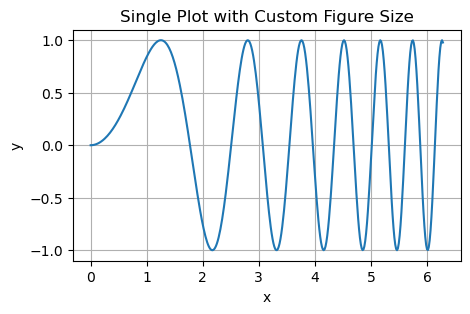

In [17]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)

plt.figure(figsize=(5, 3))  # Set the figure size
plt.plot(x, y)
plt.title('Single Plot with Custom Figure Size')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()